## Evaluación del modelo

Describiendo los datos


FuelConsumption.csv,  contiene la clasificaciones de consumo de combustible específicas del modelo y emisiones estimadas de dióxido de carbono para vehículos livianos nuevos en el mercado Canadiense del año 2014 [Dataset](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** : Año del modelo, todos son del 2014
- **MAKE** : Marca del auto
- **MODEL** : Modelo
- **VEHICLE CLASS**  : Tipo de vehiculo
- **ENGINE SIZE** : Tamaño del motor (total del desplazamiento de todos los cilindros en litros)
- **CYLINDERS** : Número de cilindros
- **TRANSMISSION** : TIpo de transmisión
- **FUEL CONSUMPTION in CITY(L/100 km)** : Consumo de combustible en litros por km en la ciudad.
- **FUEL CONSUMPTION in HWY (L/100 km)** : Consumo de combustible en litros por km en la autopista.
- **FUEL CONSUMPTION COMB (L/100 km)** : Consumo de combustible en litros por km en ciudad  y autopista.
- **CO2 EMISSIONS (g/km)** : Emisiones de CO2 en gramos por kilometro 

Ref English : https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/d589f2bc-9a85-4f65-be2f-20f17debfcb1

In [100]:
'''
Curso : Análisis de Datos con Python
Fecha : 17/01/2026
'''

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
df = pd.read_csv('dataset/my2025-fuel-consumption-ratings.csv', encoding='latin-1')
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2025,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,6
1,2025,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,5
2,2025,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,5
3,2025,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,4
4,2025,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,4


In [102]:
df.dtypes

Model year                int64
Make                     object
Model                    object
Vehicle class            object
Engine size (L)         float64
Cylinders                 int64
Transmission             object
Fuel type                object
City (L/100 km)         float64
Highway (L/100 km)      float64
Combined (L/100 km)     float64
Combined (mpg)            int64
CO2 emissions (g/km)      int64
CO2 rating                int64
Smog rating               int64
dtype: object

In [103]:
df.rename(columns={'Engine size (L)': 'ENGINESIZE',
                    'Combined (L/100 km)': 'FUELCONSUMPTION_COMB',
                    'Cylinders': 'CYLINDERS',
                   'CO2 emissions (g/km)': 'CO2EMISSIONS'}, inplace=True)


In [104]:
df.dtypes

Model year                int64
Make                     object
Model                    object
Vehicle class            object
ENGINESIZE              float64
CYLINDERS                 int64
Transmission             object
Fuel type                object
City (L/100 km)         float64
Highway (L/100 km)      float64
FUELCONSUMPTION_COMB    float64
Combined (mpg)            int64
CO2EMISSIONS              int64
CO2 rating                int64
Smog rating               int64
dtype: object

In [105]:
df.isnull().sum()

Model year              0
Make                    0
Model                   0
Vehicle class           0
ENGINESIZE              0
CYLINDERS               0
Transmission            0
Fuel type               0
City (L/100 km)         0
Highway (L/100 km)      0
FUELCONSUMPTION_COMB    0
Combined (mpg)          0
CO2EMISSIONS            0
CO2 rating              0
Smog rating             0
dtype: int64

In [106]:
df.describe()

,Model year,ENGINESIZE,CYLINDERS,City (L/100 km),Highway (L/100 km),FUELCONSUMPTION_COMB,Combined (mpg),CO2EMISSIONS,CO2 rating,Smog rating
count,650.0,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,2025.0,2.963077,5.352308,11.998769,9.187538,10.735692,28.230769,251.743077,4.638462,4.935385
std,0.0,1.201856,1.814308,3.400480,2.182063,2.794594,8.107843,64.948031,1.333484,1.335359
min,2025.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2025.0,2.000000,4.000000,9.700000,7.600000,8.800000,23.000000,206.000000,4.000000,4.000000
50%,2025.0,2.500000,4.000000,11.900000,9.000000,10.600000,27.000000,250.000000,5.000000,5.000000
75%,2025.0,3.500000,6.000000,14.075000,10.500000,12.500000,32.000000,293.000000,5.000000,6.000000
max,2025.0,8.000000,16.000000,29.700000,19.200000,25.000000,64.000000,586.000000,8.000000,7.000000


In [107]:
df.describe(include=[object])

,Make,Model,Vehicle class,Transmission,Fuel type
count,650,650,650,650,650
unique,37,551,13,20,4
top,Toyota,Sierra 4WD Mud Terrain Tire,Sport utility vehicle: Small,AS8,Z
freq,52,4,176,170,335


In [108]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,1.5,4,7.4,172
1,1.5,4,7.8,181
2,2.0,4,9.9,230
3,3.5,6,11.2,263
4,3.0,6,12.4,291


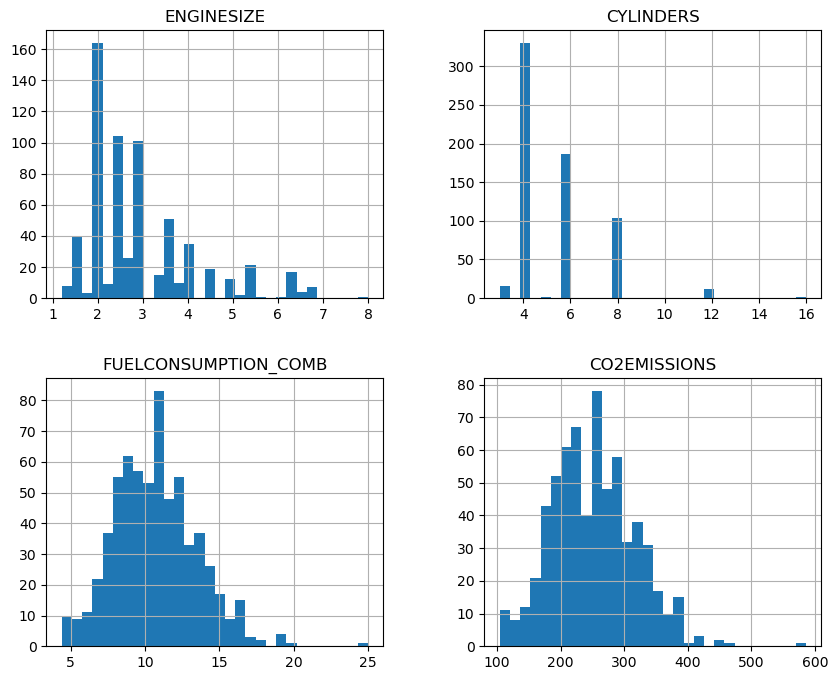

In [109]:
df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']].hist(bins=30, figsize=(10,8))
plt.show()

Generando diagramas de Regresión

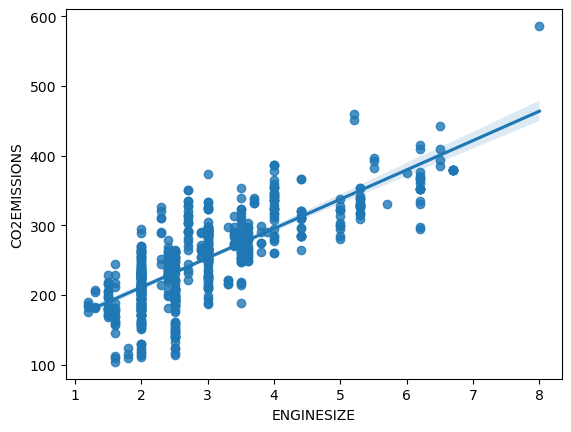

In [110]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=cdf)
plt.show()

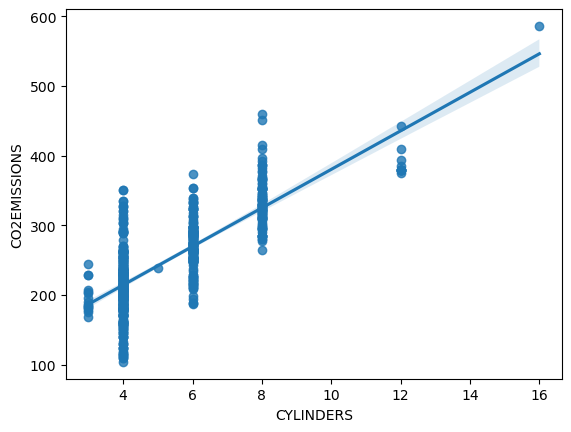

In [111]:
sns.regplot(x="CYLINDERS", y="CO2EMISSIONS", data=cdf)
plt.show()

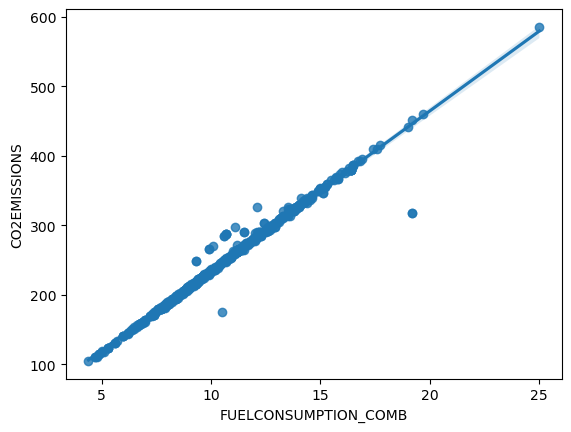

In [112]:
sns.regplot(x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", data=cdf  )   
plt.show()

# PARTE 1: Modelo de regresión simple una sola variable predictora

### 3. Seleccionando variable independiente y dependiente y separando datos en entrenamiento y prueba


In [113]:
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

print("Tamaño de X:", X.shape)

Tamaño de X: (650, 1)


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (520, 1)
Tamaño de X_test: (130, 1)
Tamaño de y_train: (520,)
Tamaño de y_test: (130,)


### 4.- Aplicando regresión simple, mostrando los coeficientes y escribiendo la ecuación


In [115]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train) 

print("Coeficiente:", lm.coef_)
print("Intercepción:", lm.intercept_)

Coeficiente: [42.03112012]
Intercepción: 128.14855194484701


$$ \hat{y} = 126.29 + 38.99x $$

### 4.-Calculando valores predichos, errores, graficando la ecuación y los residuos de los datos de entrenamiento


In [116]:
df_train = pd.concat([X_train, y_train], axis=1)


#### Graficamos el modelo

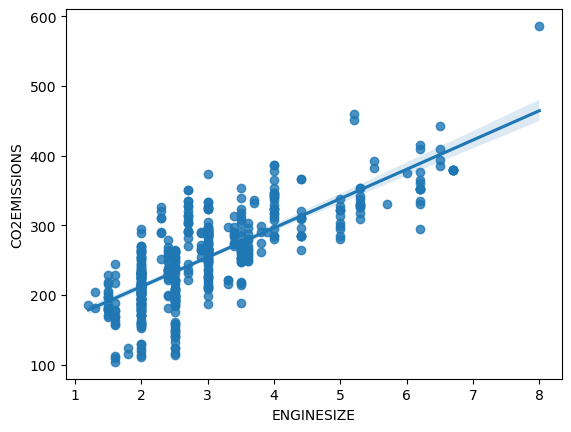

In [117]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df_train, fit_reg=True)
plt.show()

####  Graficamos los residuales

In [118]:
df_train["ERROR"] = y_train - lm.predict(X_train)
df_train["ERROR"].head()

333    -7.210792
29      2.789208
553   -20.460584
286   -51.210792
425   -58.226352
Name: ERROR, dtype: float64

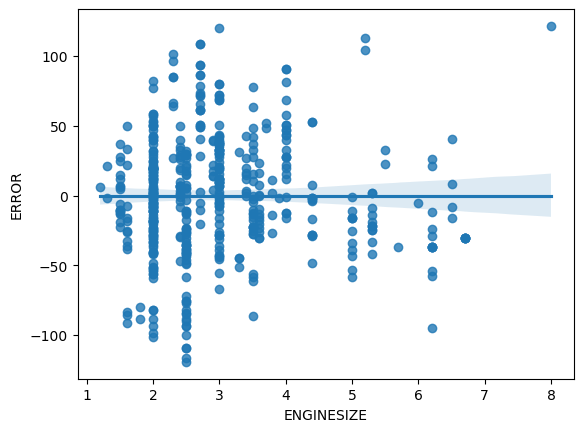

In [119]:
sns.regplot(x="ENGINESIZE", y="ERROR", data=df_train, fit_reg=True)
plt.show()

### 5.- Calculando valores predichos, errores, graficando la ecuación y los residuos de los datos de prueba


In [120]:
df_test = pd.concat([X_test, y_test], axis=1)


#### Graficamos el modelo

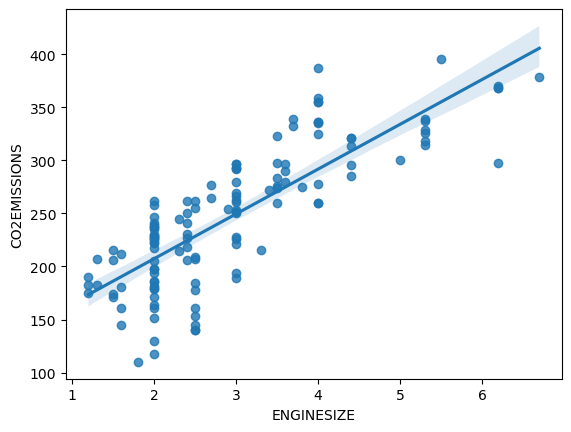

In [121]:
sns.regplot(x="ENGINESIZE", y="CO2EMISSIONS", data=df_test, fit_reg=True)
plt.show()

####  Graficamos los residuales

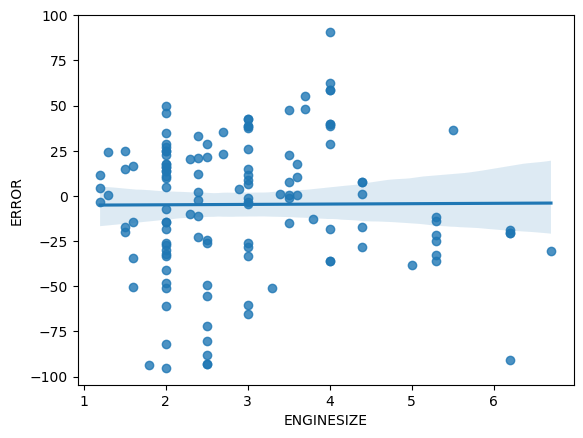

In [122]:
df_test["ERROR"] = y_test - lm.predict(X_test)
sns.regplot(x="ENGINESIZE", y="ERROR", data=df_test, fit_reg=True)
plt.show()

### 6.- Calculando MSE y R2 para modelo de regresion simple en los datos de entrenamiento y prueba


In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_hat = lm.predict(X_train)
print("MAE train:", mean_absolute_error(y_train, y_train_hat))
print("MSE train:", mean_squared_error(y_train, y_train_hat))
print("R2 train:", r2_score(y_train, y_train_hat))

y_test_hat = lm.predict(X_test)
print("MAE test:", mean_absolute_error(y_test, y_test_hat))
print("MSE test:", mean_squared_error(y_test, y_test_hat))
print("R2 test:", r2_score(y_test, y_test_hat))

MAE train: 32.211034622124124
MSE train: 1720.2635684874806
R2 train: 0.594877499838514
MAE test: 29.78435835274937
MSE test: 1417.2879789654924
R2 test: 0.650520468098005


### 7.- Haciendo predicciones y calculando métrica para regresión simple mediante validación cruzada


In [124]:
X = cdf[['ENGINESIZE']]
y = cdf['CO2EMISSIONS']

model = LinearRegression()

### **Valización Cruzada**

Es muy útil para validar que el modelo de aprendizaje automático elegido es el correcto y ayuda a evitar el overfitting.


<img src="images/kfold.jpg" width="400"/>


Documentacion 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [125]:
from sklearn.model_selection import cross_val_predict

y_cv_hat = cross_val_predict(model, X, y, cv=5)
y_cv_hat[0:5]

array([189.80021333, 189.80021333, 210.48778004, 272.55048016,
       251.86291345])

In [126]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R2 scores for each fold:", scores)
print("Mean R2 score:", scores.mean())


R2 scores for each fold: [0.71840681 0.39642927 0.59376466 0.54934585 0.50472926]
Mean R2 score: 0.5525351700208925


### 8.- Calculando métricas de desempeño para regresión simple mediante validación cruzada


In [127]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=False)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,test_neg_mean_squared_error
0,0.000830,0.000634,0.718407,-915.758332
1,0.000732,0.000508,0.396429,-2380.644407
2,0.000757,0.000505,0.593765,-1704.766941
3,0.000432,0.000412,0.549346,-1567.055264
4,0.000360,0.000389,0.504729,-2116.185060


In [128]:
MSE_test = -list_scores['test_neg_mean_squared_error']
print("MSE test for each fold:", MSE_test)
print("Mean MSE test:", MSE_test.mean())

R2_test = list_scores['test_r2']
print("R2 test for each fold:", R2_test)
print("Mean R2 test:", R2_test.mean())


MSE test for each fold: [ 915.75833172 2380.64440657 1704.76694073 1567.05526401 2116.18506006]
Mean MSE test: 1736.8820006183819
R2 test for each fold: [0.71840681 0.39642927 0.59376466 0.54934585 0.50472926]
Mean R2 test: 0.5525351700208925


In [129]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=True)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.001141,0.000748,0.718407,0.584029,-915.758332,-1847.878188
1,0.000551,0.000425,0.396429,0.610629,-2380.644407,-1508.926352
2,0.000415,0.000449,0.593765,0.604326,-1704.766941,-1654.406994
3,0.000388,0.000536,0.549346,0.606754,-1567.055264,-1691.304871
4,0.000487,0.000460,0.504729,0.626130,-2116.185060,-1547.563983


In [130]:
MSE_train = -list_scores['train_neg_mean_squared_error']
print("MSE train for each fold:", MSE_train)
print("Mean MSE train:", MSE_train.mean())

R2_train = list_scores['train_r2']
print("R2 train for each fold:", R2_train)
print("Mean R2 train:", R2_train.mean())

MSE train for each fold: [1847.87818761 1508.9263522  1654.40699408 1691.30487136 1547.56398293]
Mean MSE train: 1650.016077637723
R2 train for each fold: [0.58402884 0.61062872 0.60432614 0.60675361 0.62613025]
Mean R2 train: 0.6063735135361756


### 9.- Coeficientes para regresión simple mediante validación cruzada


In [131]:
from sklearn.model_selection import cross_validate

estimators = cross_validate(model, X, y, cv=5, return_estimator=True)

df_estimators = pd.DataFrame(estimators)
df_estimators.head()

,fit_time,score_time,estimator,test_score
0,0.000904,0.000318,LinearRegression(),0.718407
1,0.000756,0.000386,LinearRegression(),0.396429
2,0.000751,0.000414,LinearRegression(),0.593765
3,0.001006,0.000600,LinearRegression(),0.549346
4,0.000587,0.000359,LinearRegression(),0.504729


In [132]:
for i, est in enumerate(estimators['estimator']):
    print(f"Estimator {i} coefficients: {est.coef_}, intercept: {est.intercept_}")

Estimator 0 coefficients: [41.37513342], intercept: 127.73751320490689
Estimator 1 coefficients: [44.89156465], intercept: 115.1141009862844
Estimator 2 coefficients: [42.42843769], intercept: 128.37547955145482
Estimator 3 coefficients: [40.17712071], intercept: 134.27644517050052
Estimator 4 coefficients: [41.84501136], intercept: 129.31636391093122


### 10.- Creando función para gráfico de distribución


In [133]:
def distribution_plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(6, 6))
    sns.kdeplot(RedFunction, color="red", label=RedName)
    sns.kdeplot(BlueFunction, color="blue", label=BlueName)
    plt.title(Title)
    plt.xlabel('Emisión de CO2')
    plt.ylabel('Tamaño del motor del auto')
    plt.legend()
    plt.show()

### 11.- Realizando gráficos de predicciones para datos de entrenamiento y prueba


In [134]:
from sklearn.linear_model import LinearRegression

# Entrenamiento del modelo
lm = LinearRegression()
lm.fit(X_train, y_train) 

# Valores calculados
y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)


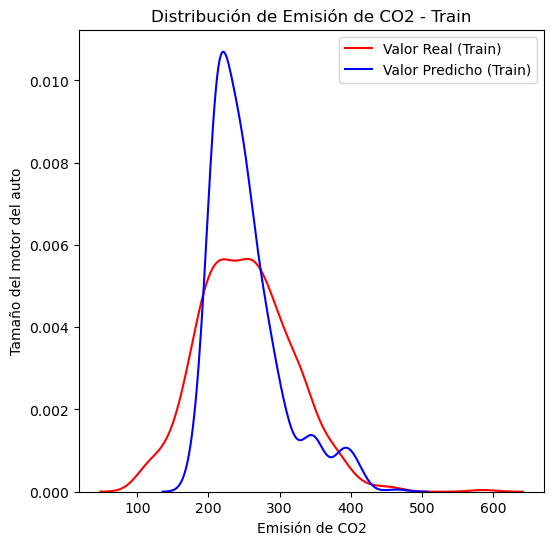

In [135]:
# Distribución de los valores reales vs valores predichos - Train data
distribution_plot(y_train, y_train_hat, "Valor Real (Train)", "Valor Predicho (Train)", "Distribución de Emisión de CO2 - Train")   

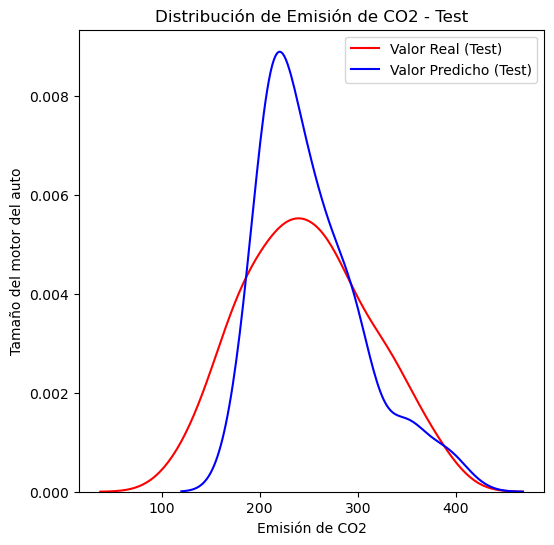

In [136]:
# Distribución de los valores reales vs valores predichos - Test data
distribution_plot(y_test, y_test_hat, "Valor Real (Test)", "Valor Predicho (Test)", "Distribución de Emisión de CO2 - Test")   

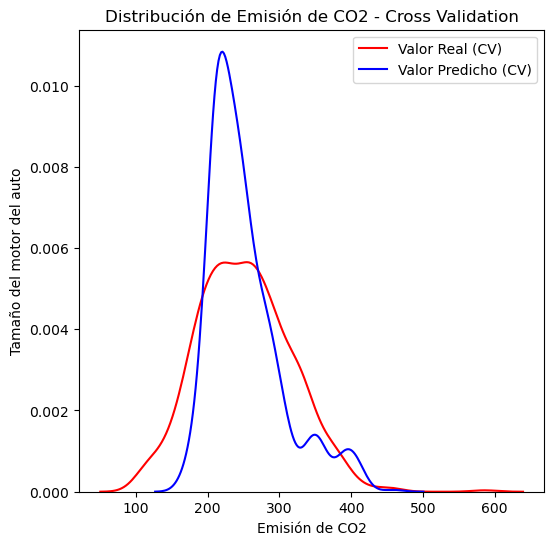

In [137]:
# Distribución de los valores reales vs valores predichos - Cross Validation data
distribution_plot(y, y_cv_hat, "Valor Real (CV)", "Valor Predicho (CV)", "Distribución de Emisión de CO2 - Cross Validation")

# PARTE 2: Modelo de regresión con varias variables predictora

In [138]:
X = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = cdf['CO2EMISSIONS']

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (520, 3)
Tamaño de X_test: (130, 3)
Tamaño de y_train: (520,)
Tamaño de y_test: (130,)


In [140]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train) 

print("Coeficiente:", lm.coef_)
print("Intercepción:", lm.intercept_)

Coeficiente: [-1.34178274  0.90659632 23.14657078]
Intercepción: 2.836040046640562


$$ \hat{y} = 67.35 + 11.21x_{1} + 7.16x_{2} + 9.52x_{3} $$

In [141]:
df_train = pd.concat([X_train, y_train], axis=1)
y_train_hat = lm.predict(X_train)
residuales = y_train - y_train_hat
residuales.head()

333   -2.468683
29    -1.727311
553    0.942521
286   -2.490198
425   -1.707249
Name: CO2EMISSIONS, dtype: float64

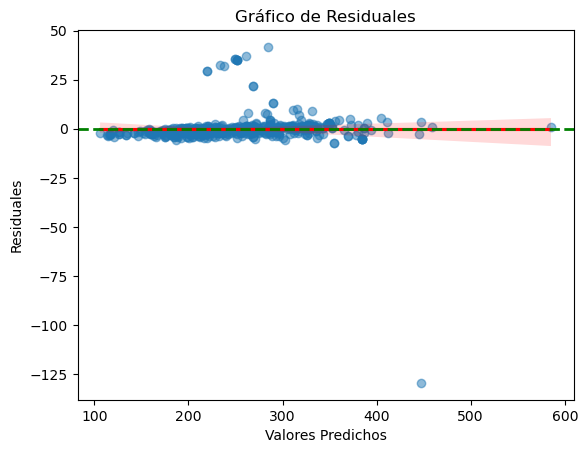

In [142]:

sns.regplot(x=y_train_hat, y=residuales, 
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'})
plt.axhline(y=0, color='green', linestyle='--', linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.show()

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_hat = lm.predict(X_train)
print("MAE train:", mean_absolute_error(y_train, y_train_hat))
print("MSE train:", mean_squared_error(y_train, y_train_hat))
print("R2 train:", r2_score(y_train, y_train_hat))

y_test_hat = lm.predict(X_test)
print("MAE test:", mean_absolute_error(y_test, y_test_hat))
print("MSE test:", mean_squared_error(y_test, y_test_hat))
print("R2 test:", r2_score(y_test, y_test_hat))

MAE train: 2.8851628050142826
MSE train: 67.6932862173031
R2 train: 0.9840582141836479
MAE test: 3.4375206645721934
MSE test: 181.5159885607874
R2 test: 0.9552411904592212


In [144]:
from sklearn.model_selection import cross_val_predict

y_cv_hat = cross_val_predict(model, X, y, cv=5)

In [145]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=False)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,test_neg_mean_squared_error
0,0.001438,0.003339,0.997427,-8.369030
1,0.002814,0.000686,0.935197,-255.598998
2,0.000791,0.000589,0.956601,-182.124685
3,0.000910,0.000770,0.998129,-6.506330
4,0.000876,0.000733,0.997666,-9.972625


In [146]:
MSE_test = -list_scores['test_neg_mean_squared_error']
print("MSE test for each fold:", MSE_test)
print("Mean MSE test:", MSE_test.mean())

R2_test = list_scores['test_r2']
print("R2 test for each fold:", R2_test)
print("Mean R2 test:", R2_test.mean())

MSE test for each fold: [  8.36903042 255.59899762 182.12468515   6.50632967   9.97262537]
Mean MSE test: 92.51433364584992
R2 test for each fold: [0.99742655 0.93519735 0.95660082 0.99812891 0.99766601]
Mean R2 test: 0.9770039272279689


In [147]:
from sklearn.model_selection import cross_validate

list_scoring = ['r2', 'neg_mean_squared_error']
list_scores = cross_validate(model, X, y, cv=5, scoring=list_scoring, return_train_score=True)

df_scores = pd.DataFrame(list_scores)
df_scores.head()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.001092,0.000572,0.997427,0.975145,-8.369030,-110.414812
1,0.000819,0.000505,0.935197,0.987346,-255.598998,-49.039475
2,0.000439,0.000409,0.956601,0.983929,-182.124685,-67.197904
3,0.000408,0.000428,0.998129,0.974232,-6.506330,-110.826602
4,0.000413,0.000402,0.997666,0.973368,-9.972625,-110.238706


In [148]:
MSE_train = -list_scores['train_neg_mean_squared_error']
print("MSE train for each fold:", MSE_train)
print("Mean MSE train:", MSE_train.mean())

R2_train = list_scores['train_r2']
print("R2 train for each fold:", R2_train)
print("Mean R2 train:", R2_train.mean())

MSE train for each fold: [110.41481164  49.03947509  67.19790396 110.82660198 110.23870625]
Mean MSE train: 89.54349978390964
R2 train for each fold: [0.9751448  0.9873456  0.98392871 0.97423164 0.97336788]
Mean R2 train: 0.9788037239382786


### Graficando valores del MSE para los datos de entrenamiento y prueba


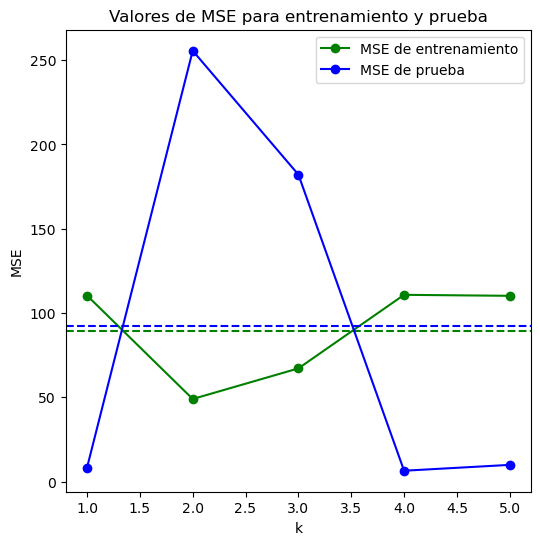

In [149]:
k = np.arange(1,len(MSE_train)+1)
plt.figure(figsize=(6,6))
plt.title('Valores de MSE para entrenamiento y prueba')
plt.plot(k,MSE_train,marker='o',linestyle='-',color='g',label='MSE de entrenamiento')
plt.axhline(y=np.mean(MSE_train),color='g',linestyle='--')
plt.plot(k,MSE_test,marker='o',linestyle='-',color='b',label='MSE de prueba')
plt.axhline(y=np.mean(MSE_test),color='b',linestyle='--')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')
plt.show()

### Graficando valores del R2 para los datos de entrenamiento y prueba


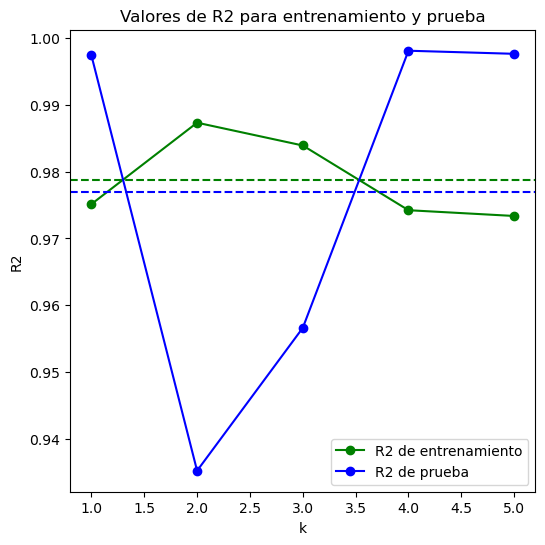

In [150]:
k = np.arange(1,len(MSE_train)+1)
plt.figure(figsize=(6,6))
plt.title('Valores de R2 para entrenamiento y prueba')
plt.plot(k,R2_train,marker='o',linestyle='-',color='g',label='R2 de entrenamiento')
plt.axhline(y=np.mean(R2_train),color='g',linestyle='--')
plt.plot(k,R2_test,marker='o',linestyle='-',color='b',label='R2 de prueba')
plt.axhline(y=np.mean(R2_test),color='b',linestyle='--')
plt.legend()
plt.xlabel('k')
plt.ylabel('R2')
plt.show()

### Coeficientes para regresión múltiple mediante validación cruzada

In [151]:
X = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = cdf['CO2EMISSIONS']
model = LinearRegression()

In [152]:
from sklearn.model_selection import cross_validate

estimators = cross_validate(model, X, y, cv=5, return_estimator=True)

df_estimators = pd.DataFrame(estimators)
df_estimators.head()

,fit_time,score_time,estimator,test_score
0,0.001095,0.000381,LinearRegression(),0.997427
1,0.001028,0.000578,LinearRegression(),0.935197
2,0.000618,0.000376,LinearRegression(),0.956601
3,0.000413,0.000342,LinearRegression(),0.998129
4,0.000465,0.000340,LinearRegression(),0.997666


In [153]:
for i, est in enumerate(estimators['estimator']):
    print(f"Estimator {i} coefficients: {est.coef_}, intercept: {est.intercept_}")

Estimator 0 coefficients: [-1.60348847  1.55404661 22.70581525], intercept: 4.706043151612192
Estimator 1 coefficients: [-1.57966278  1.08444675 23.04942788], intercept: 2.6351147096889633
Estimator 2 coefficients: [-0.51856632  0.54395161 23.02988803], intercept: 3.0255604561726557
Estimator 3 coefficients: [-1.16067816  1.31175298 22.6382374 ], intercept: 5.356977058106253
Estimator 4 coefficients: [-0.67882731  1.35378859 22.44891533], intercept: 5.686993745930465


## Realizando gráficos de predicciones para datos de entrenamiento y prueba

In [154]:
from sklearn.linear_model import LinearRegression

# Entrenamiento del modelo
lm = LinearRegression()
lm.fit(X_train, y_train) 

# Valores calculados
y_train_hat = lm.predict(X_train)
y_test_hat = lm.predict(X_test)

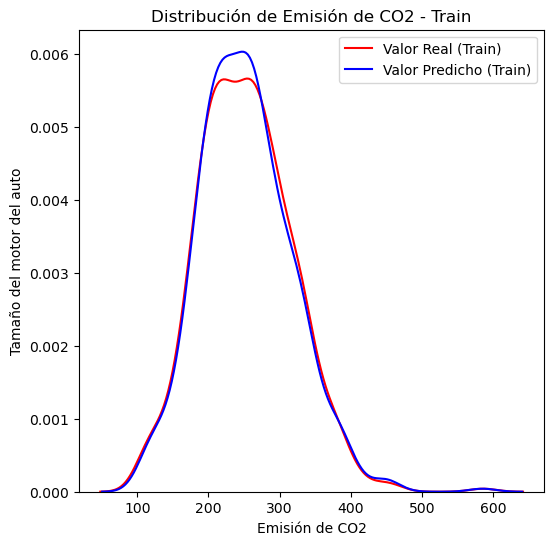

In [155]:
# Distribución de los valores reales vs valores predichos - Train data
distribution_plot(y_train, y_train_hat, "Valor Real (Train)", "Valor Predicho (Train)", "Distribución de Emisión de CO2 - Train")   

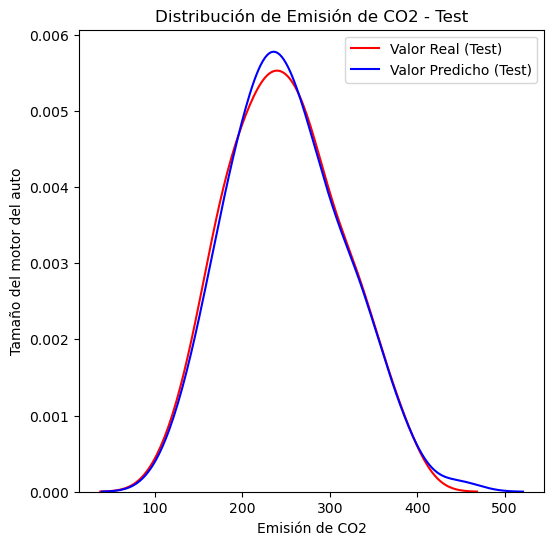

In [156]:
# Distribución de los valores reales vs valores predichos - Test data
distribution_plot(y_test, y_test_hat, "Valor Real (Test)", "Valor Predicho (Test)", "Distribución de Emisión de CO2 - Test")   

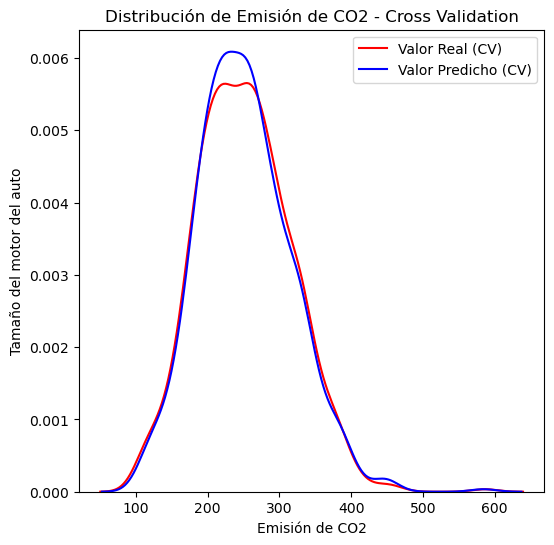

In [157]:
# Distribución de los valores reales vs valores predichos - Cross Validation data
distribution_plot(y, y_cv_hat, "Valor Real (CV)", "Valor Predicho (CV)", "Distribución de Emisión de CO2 - Cross Validation")

### AIC y BIC

In [158]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,1.5,4,7.4,172
1,1.5,4,7.8,181
2,2.0,4,9.9,230
3,3.5,6,11.2,263
4,3.0,6,12.4,291


In [159]:
# Regresión usando la librería statsmodels
import statsmodels.formula.api as smf
modelo1 = smf.ols('CO2EMISSIONS ~  ENGINESIZE', data=cdf).fit()
modelo2 = smf.ols('CO2EMISSIONS ~  CYLINDERS', data=cdf).fit()
modelo3 = smf.ols('CO2EMISSIONS ~  FUELCONSUMPTION_COMB', data=cdf).fit()
modelo4 = smf.ols('CO2EMISSIONS ~  ENGINESIZE + CYLINDERS + FUELCONSUMPTION_COMB', data=cdf).fit()

In [160]:
resultados = pd.DataFrame({
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4'],
    'AIC': [round(modelo1.aic, 2), round(modelo2.aic, 2), 
            round(modelo3.aic, 2), round(modelo4.aic, 2)],
    'BIC': [round(modelo1.bic, 2), round(modelo2.bic, 2), 
            round(modelo3.bic, 2), round(modelo4.bic, 2)]
})
resultados

,Modelo,AIC,BIC
0,Modelo 1,6667.61,6676.56
1,Modelo 2,6683.93,6692.89
2,Modelo 3,4777.10,4786.05
3,Modelo 4,4776.30,4794.21


In [161]:
for i in range(len(resultados)):
    if (resultados['AIC'][i] == np.min(resultados['AIC'])):
        min_AIC = resultados['AIC'][i]
        modelo_AIC = resultados['Modelo'][i]
    else:
        continue

print("Mejor modelo según AIC es", modelo_AIC, "con AIC =", min_AIC)

Mejor modelo según AIC es Modelo 4 con AIC = 4776.3


In [162]:
for i in range(len(resultados)):
    if (resultados['BIC'][i] == np.min(resultados['BIC'])):
        min_BIC = resultados['BIC'][i]
        modelo_BIC = resultados['Modelo'][i]
    else:
        continue

print("Mejor modelo según BIC es", modelo_BIC, "con BIC =", min_BIC)

Mejor modelo según BIC es Modelo 3 con BIC = 4786.05
